In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [9]:
df1 = pd.read_csv(r"D:\user\sai pranav\Downlaods\house price\Melbourne_housing_FULL.csv")
df1.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [10]:
df1.shape

(34857, 21)

In [12]:
df1.nunique()#checking the unique values in the functions 

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [20]:
df2 = df1.drop(['Address','SellerG','Date','CouncilArea','Postcode','Propertycount','Suburb','Lattitude','Longtitude'],axis='columns')
df2.head()#dropping the columns which does not affect or alter much the dependent variables 
# lattitude and longitude do not change a lot across the rows etc

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname
0,2,h,NaN,SS,2.5,2.0,1.0,1.0,126.0,NaN,NaN,Northern Metropolitan
1,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan
2,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan
3,3,u,NaN,VB,2.5,3.0,2.0,1.0,0.0,NaN,NaN,Northern Metropolitan
4,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan


In [21]:
df2.head()
df2.shape


(34857, 12)

In [22]:
df2.isnull().sum()# checking the null values here we cannot takedown the rows of null values because the ratio of null and rows are higher 

Rooms               0
Type                0
Price            7610
Method              0
Distance            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize        11810
BuildingArea    21115
YearBuilt       19306
Regionname          3
dtype: int64

In [28]:
columns_to_calculate_mean = ['Price', 'Distance', 'Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']
mean_values = df2[columns_to_calculate_mean].mean().astype(int)
df2[columns_to_calculate_mean] = df2[columns_to_calculate_mean].fillna(mean_values)
# plugging the null values by inserting mean values of its respective columns 

In [29]:
df2.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname
0,2,h,1050173.0,SS,2.5,2.0,1.0,1.0,126.0,160.0,1965.0,Northern Metropolitan
1,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,160.0,1965.0,Northern Metropolitan
2,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan
3,3,u,1050173.0,VB,2.5,3.0,2.0,1.0,0.0,160.0,1965.0,Northern Metropolitan
4,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan


In [30]:

df2.isnull().sum()

Rooms           0
Type            0
Price           0
Method          0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
Regionname      3
dtype: int64

In [32]:
df2.dropna(inplace=True)
df2.isnull().sum()
# Here the region is the category which has 3 null values so dropping their rows makes sense 

Rooms           0
Type            0
Price           0
Method          0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
Regionname      0
dtype: int64

In [34]:
df2.nunique()


Rooms             12
Type               3
Price           2872
Method             9
Distance         215
Bedroom2          15
Bathroom          11
Car               15
Landsize        1684
BuildingArea     740
YearBuilt        160
Regionname         8
dtype: int64

In [55]:
columns_to_calculate_stats = ['Rooms','BuildingArea','Landsize','Price','Bathroom']
max_values = df2[columns_to_calculate_stats].max()
min_values = df2[columns_to_calculate_stats].min()
mean_values = df2[columns_to_calculate_stats].mean()
median_values = df2[columns_to_calculate_stats].median()
mode_values = df2[columns_to_calculate_stats].mode().iloc[0]
#here the min has zero for the columns where zero is present which does not make sense like the building area, land size etc


In [56]:
print("Maximum values:", max_values)
print("Minimum values:", min_values)
print("Mean values:", mean_values)
print("Median values:", median_values)
print("Mode values:", mode_values)


Maximum values: Rooms                 16.0
BuildingArea       44515.0
Landsize          433014.0
Price           11200000.0
Bathroom              12.0
dtype: float64
Minimum values: Rooms               1.00
BuildingArea        0.01
Landsize            1.00
Price           85000.00
Bathroom            0.00
dtype: float64
Mean values: Rooms           3.030364e+00
BuildingArea    1.604510e+02
Landsize        6.017175e+02
Price           1.050168e+06
Bathroom        1.476968e+00
dtype: float64
Median values: Rooms                 3.0
BuildingArea        160.0
Landsize            593.0
Price           1050173.0
Bathroom              1.0
dtype: float64
Mode values: Rooms                 3.0
BuildingArea        160.0
Landsize            593.0
Price           1050173.0
Bathroom              1.0
Name: 0, dtype: float64


In [54]:
columns_to_check = ['BuildingArea','Landsize']
repetitive_zero_counts = df2[df2[columns_to_check] == 0].count()
print("Repetitive Zero Counts:")
for column, count in repetitive_zero_counts.iteritems():
    print(f"{column}: {count}")
# having zero as values in the landsize and buildingarea doesnt make sense so checking the the number of zeros repeating in the respective columns 

Repetitive Zero Counts:
Rooms: 0
Type: 0
Price: 0
Method: 0
Distance: 0
Bedroom2: 0
Bathroom: 0
Car: 0
Landsize: 0
BuildingArea: 0
YearBuilt: 0
Regionname: 0


C:\Users\Sai Pranav\AppData\Local\Temp\ipykernel_26996\1178589745.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in repetitive_zero_counts.iteritems():


In [53]:
import numpy as np


df2 = df2[df2['BuildingArea'] != 0]


df2.loc[df2['Landsize'] == 0, 'Landsize'] = df2.loc[df2['Landsize'] == 0, 'BuildingArea']
# By the above conclusion the building rows which have zero are dropped since it has in less numbered compared to land size and the land size which are remained as zero are changed to the value of building area 

In [58]:

df2.loc[df2['Landsize'] < df2['BuildingArea'], 'BuildingArea'] = df2.loc[df2['Landsize'] < df2['BuildingArea'], 'Landsize']
# building area should not be more than land size

In [59]:
df2.shape

(34778, 12)

In [60]:
df2.drop('Method', axis=1, inplace=True)

df2.shape



(34778, 11)

In [61]:
df2.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname
0,2,h,1050173.0,2.5,2.0,1.0,1.0,126.0,126.0,1965.0,Northern Metropolitan
1,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,160.0,1965.0,Northern Metropolitan
2,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan
3,3,u,1050173.0,2.5,3.0,2.0,1.0,160.0,160.0,1965.0,Northern Metropolitan
4,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,134.0,1900.0,Northern Metropolitan


In [62]:
df2.tail()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname
34852,4,h,1480000.0,6.3,4.0,1.0,3.0,593.0,160.0,1965.0,Western Metropolitan
34853,2,h,888000.0,6.3,2.0,2.0,1.0,98.0,98.0,2018.0,Western Metropolitan
34854,2,t,705000.0,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,Western Metropolitan
34855,3,h,1140000.0,6.3,3.0,1.0,1.0,593.0,160.0,1965.0,Western Metropolitan
34856,2,h,1020000.0,6.3,2.0,1.0,0.0,250.0,103.0,1930.0,Western Metropolitan


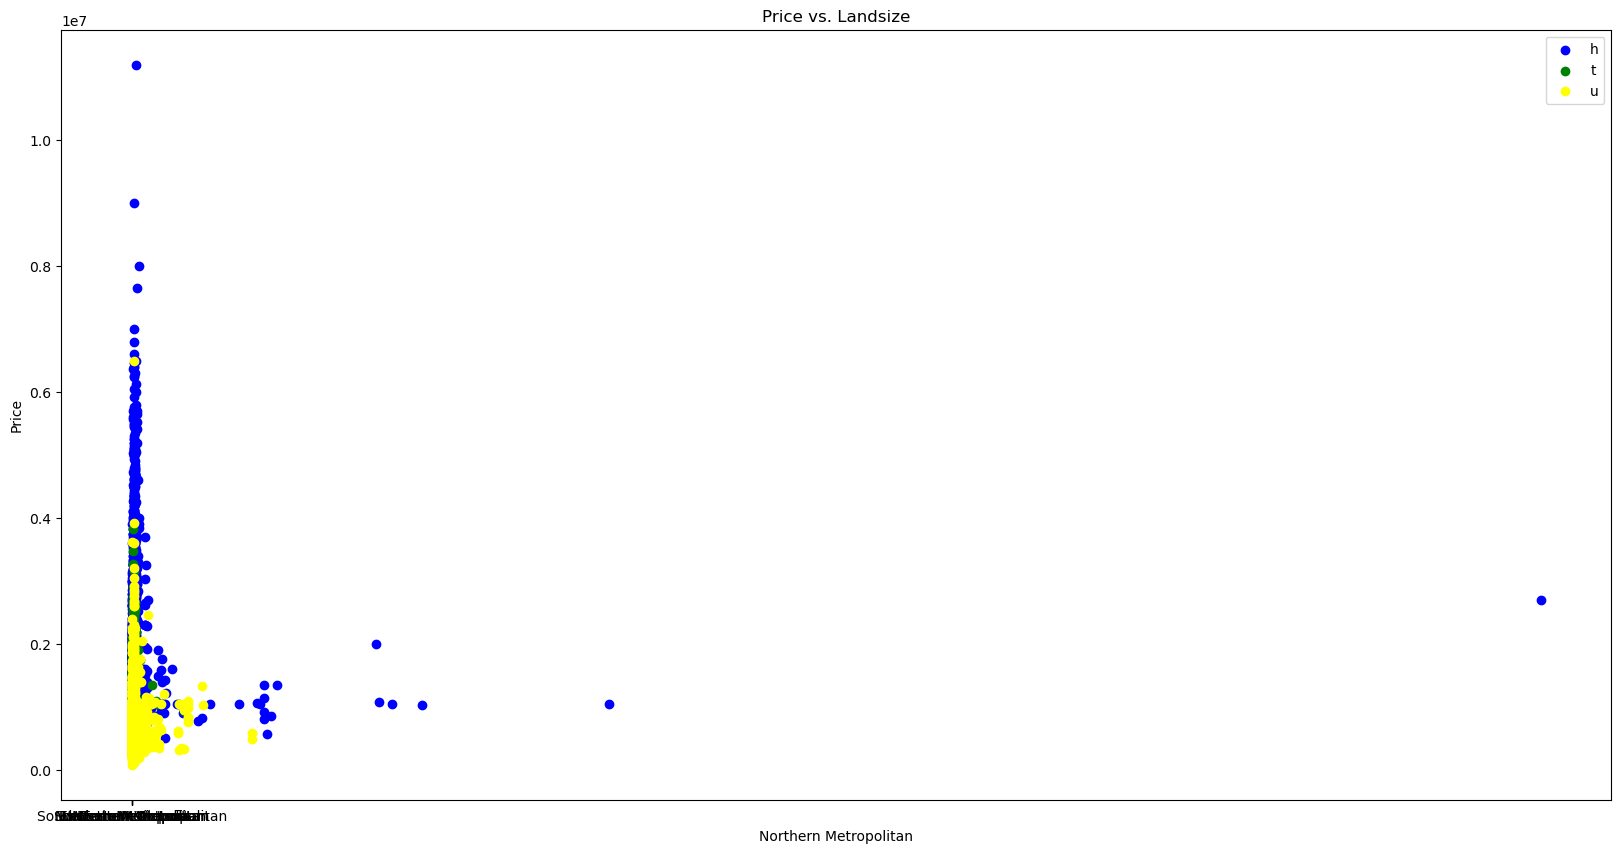

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'

# Define colors for each unique value of 'type'
type_colors = {'h': 'blue', 't': 'green', 'u': 'yellow'}

# Plot scatter plot
for type_value, color in type_colors.items():
    plt.scatter(df2.loc[df2['Type'] == type_value, 'Landsize'], df2.loc[df2['Type'] == type_value, 'Price'], color=color, label=type_value)

# Set regions as labels for x-axis
plt.xticks(range(8), df2['Regionname'].unique())

# Set labels and title
plt.xlabel('Northern Metropolitan')
plt.ylabel('Price')
plt.title('Price vs. Landsize')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [101]:
import pandas as pd


encoded_columns = pd.get_dummies(df2.Regionname)


df3 = pd.concat([df2, encoded_columns], axis=1)
df3.head()
# the categorical section is converted into binary digits





,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,1050173.0,2.5,2.0,1.0,1.0,126.0,126.0,1965.0,Northern Metropolitan,0,0,1,0,0,0,0,0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,160.0,1965.0,Northern Metropolitan,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,0,0,1,0,0,0,0,0
3,3,1050173.0,2.5,3.0,2.0,1.0,160.0,160.0,1965.0,Northern Metropolitan,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,134.0,1900.0,Northern Metropolitan,0,0,1,0,0,0,0,0


In [102]:
df3.drop('Regionname', axis=1, inplace=True)



In [103]:

df3.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,1050173.0,2.5,2.0,1.0,1.0,126.0,126.0,1965.0,0,0,1,0,0,0,0,0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,160.0,1965.0,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,0,0,1,0,0,0,0,0
3,3,1050173.0,2.5,3.0,2.0,1.0,160.0,160.0,1965.0,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,134.0,1900.0,0,0,1,0,0,0,0,0


In [182]:
import pandas as pd




X = df3.drop('Price', axis=1, inplace=False)
print(X.head())




   Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
0      2       2.5       2.0       1.0  1.0     126.0         126.0   
1      2       2.5       2.0       1.0  1.0     202.0         160.0   
2      2       2.5       2.0       1.0  0.0     156.0          79.0   
3      3       2.5       3.0       2.0  1.0     160.0         160.0   
4      3       2.5       3.0       2.0  0.0     134.0         134.0   

   YearBuilt  Eastern Metropolitan  Eastern Victoria  Northern Metropolitan  \
0     1965.0                     0                 0                      1   
1     1965.0                     0                 0                      1   
2     1900.0                     0                 0                      1   
3     1965.0                     0                 0                      1   
4     1900.0                     0                 0                      1   

   Northern Victoria  South-Eastern Metropolitan  Southern Metropolitan  \
0                  0   

In [180]:
df3.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,1050173.0,2.5,2.0,1.0,1.0,126.0,126.0,1965.0,0,0,1,0,0,0,0,0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,160.0,1965.0,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,0,0,1,0,0,0,0,0
3,3,1050173.0,2.5,3.0,2.0,1.0,160.0,160.0,1965.0,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,134.0,1900.0,0,0,1,0,0,0,0,0


In [181]:
y = df3.Price
y.head()


0    1050173.0
1    1480000.0
2    1035000.0
3    1050173.0
4    1465000.0
Name: Price, dtype: float64

In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets ( 80% , 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the training and testing sets back to DataFrames
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['target'] = y_train

test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['target'] = y_test

# Display the training and testing DataFrames
print("Training DataFrame:")
print(train_df.head())
print("\nTesting DataFrame:")
print(test_df.head())



Training DataFrame:
       Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
32303      2      27.0       3.0       1.0  1.0     593.0         160.0   
30699      4       8.4       4.0       2.0  2.0     424.0         232.0   
6943       3       6.9       3.0       1.0  2.0     538.0         116.0   
2214       1       5.2       1.0       1.0  1.0      51.0          51.0   
15827      3      18.8       3.0       1.0  2.0     801.0         160.0   

       YearBuilt  Eastern Metropolitan  Eastern Victoria  \
32303     1965.0                     0                 0   
30699     2013.0                     0                 0   
6943      1925.0                     0                 0   
2214      1970.0                     0                 0   
15827     1965.0                     0                 0   

       Northern Metropolitan  Northern Victoria  South-Eastern Metropolitan  \
32303                      0                  0                           1   
30699     

In [185]:
print(X_train)



       Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
32303      2      27.0       3.0       1.0  1.0     593.0         160.0   
30699      4       8.4       4.0       2.0  2.0     424.0         232.0   
6943       3       6.9       3.0       1.0  2.0     538.0         116.0   
2214       1       5.2       1.0       1.0  1.0      51.0          51.0   
15827      3      18.8       3.0       1.0  2.0     801.0         160.0   
...      ...       ...       ...       ...  ...       ...           ...   
16851      3      24.7       3.0       1.0  2.0     540.0         160.0   
6265       2       7.4       3.0       1.0  1.0     593.0         160.0   
11285      3      12.4       3.0       1.0  1.0     285.0         160.0   
860        5       9.7       5.0       3.0  2.0     600.0         356.0   
15796      3      17.2       3.0       1.0  2.0     785.0         160.0   

       YearBuilt  Eastern Metropolitan  Eastern Victoria  \
32303     1965.0                     0 

In [186]:
print(X_test)

       Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
14286      3      12.1       3.0       1.0  1.0     593.0         160.0   
9147       2       2.1       2.0       1.0  0.0      80.0          80.0   
27670      2       6.7       2.0       1.0  1.0     368.0         160.0   
18943      2      27.0       2.0       1.0  2.0     224.0         104.0   
32255      2       4.6       2.0       1.0  1.0     143.0          84.0   
...      ...       ...       ...       ...  ...       ...           ...   
10019      3      11.2       3.0       2.0  2.0     226.0         160.0   
10709      3       8.0       3.0       2.0  1.0     151.0         148.0   
31152      3      23.0       3.0       2.0  4.0     858.0         140.0   
21256      4       5.3       4.0       2.0  5.0     750.0         232.0   
26410      3      15.2       3.0       1.0  1.0     593.0         160.0   

       YearBuilt  Eastern Metropolitan  Eastern Victoria  \
14286     1965.0                     0 

In [189]:
import pandas as pd
import numpy as np



# Convert the NumPy array to a DataFrame
df_xtest = pd.DataFrame(X_test)

# Display the DataFrame
print(df_xtest)



       Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
14286      3      12.1       3.0       1.0  1.0     593.0         160.0   
9147       2       2.1       2.0       1.0  0.0      80.0          80.0   
27670      2       6.7       2.0       1.0  1.0     368.0         160.0   
18943      2      27.0       2.0       1.0  2.0     224.0         104.0   
32255      2       4.6       2.0       1.0  1.0     143.0          84.0   
...      ...       ...       ...       ...  ...       ...           ...   
10019      3      11.2       3.0       2.0  2.0     226.0         160.0   
10709      3       8.0       3.0       2.0  1.0     151.0         148.0   
31152      3      23.0       3.0       2.0  4.0     858.0         140.0   
21256      4       5.3       4.0       2.0  5.0     750.0         232.0   
26410      3      15.2       3.0       1.0  1.0     593.0         160.0   

       YearBuilt  Eastern Metropolitan  Eastern Victoria  \
14286     1965.0                     0 

In [190]:
df_xtest.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,target
14286,3,12.1,3.0,1.0,1.0,593.0,160.0,1965.0,0,0,1,0,0,0,0,0,510000.0
9147,2,2.1,2.0,1.0,0.0,80.0,80.0,1965.0,0,0,0,0,0,1,0,0,1050173.0
27670,2,6.7,2.0,1.0,1.0,368.0,160.0,1965.0,0,0,1,0,0,0,0,0,870000.0
18943,2,27.0,2.0,1.0,2.0,224.0,104.0,2000.0,0,0,0,0,1,0,0,0,724000.0
32255,2,4.6,2.0,1.0,1.0,143.0,84.0,1910.0,0,0,0,0,0,1,0,0,1050173.0


In [191]:

 df_xtest = df_xtest.drop('target', axis=1)
 df_xtest.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
14286,3,12.1,3.0,1.0,1.0,593.0,160.0,1965.0,0,0,1,0,0,0,0,0
9147,2,2.1,2.0,1.0,0.0,80.0,80.0,1965.0,0,0,0,0,0,1,0,0
27670,2,6.7,2.0,1.0,1.0,368.0,160.0,1965.0,0,0,1,0,0,0,0,0
18943,2,27.0,2.0,1.0,2.0,224.0,104.0,2000.0,0,0,0,0,1,0,0,0
32255,2,4.6,2.0,1.0,1.0,143.0,84.0,1910.0,0,0,0,0,0,1,0,0


In [192]:
X_test_removetarget = df_xtest.values


In [193]:
print(X_test_removetarget)

[[ 3.  12.1  3.  ...  0.   0.   0. ]
 [ 2.   2.1  2.  ...  1.   0.   0. ]
 [ 2.   6.7  2.  ...  0.   0.   0. ]
 ...
 [ 3.  23.   3.  ...  0.   0.   0. ]
 [ 4.   5.3  4.  ...  1.   0.   0. ]
 [ 3.  15.2  3.  ...  1.   0.   0. ]]


In [194]:
X_test_removetarget.shape

(6956, 16)

In [195]:
df_xtrain = pd.DataFrame(X_train)


In [196]:
df_xtrain.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,target
32303,2,27.0,3.0,1.0,1.0,593.0,160.0,1965.0,0,0,0,0,1,0,0,0,620000.0
30699,4,8.4,4.0,2.0,2.0,424.0,232.0,2013.0,0,0,1,0,0,0,0,0,1500000.0
6943,3,6.9,3.0,1.0,2.0,538.0,116.0,1925.0,0,0,0,0,0,0,1,0,1050173.0
2214,1,5.2,1.0,1.0,1.0,51.0,51.0,1970.0,0,0,1,0,0,0,0,0,279500.0
15827,3,18.8,3.0,1.0,2.0,801.0,160.0,1965.0,0,0,0,0,1,0,0,0,901000.0


In [197]:
df_xtrain = df_xtrain.drop('target', axis=1)

In [198]:
df_xtrain.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
32303,2,27.0,3.0,1.0,1.0,593.0,160.0,1965.0,0,0,0,0,1,0,0,0
30699,4,8.4,4.0,2.0,2.0,424.0,232.0,2013.0,0,0,1,0,0,0,0,0
6943,3,6.9,3.0,1.0,2.0,538.0,116.0,1925.0,0,0,0,0,0,0,1,0
2214,1,5.2,1.0,1.0,1.0,51.0,51.0,1970.0,0,0,1,0,0,0,0,0
15827,3,18.8,3.0,1.0,2.0,801.0,160.0,1965.0,0,0,0,0,1,0,0,0


In [199]:
X_train_removetarget = df_xtrain.values

In [219]:
import numpy as np




# Add a column of ones to X_train and X_test for the intercept term
X_train_removetarget = np.c_[np.ones(X_train_removetarget.shape[0]), X_train_removetarget]
X_test_removetarget = np.c_[np.ones(X_test_removetarget.shape[0]), X_test_removetarget]

# Calculate the regression coefficients using the normal equation
coefficients = np.linalg.inv(X_train_removetarget.T @ X_train_removetarget) @ X_train_removetarget.T @ y_train


# Separate the intercept and coefficients
intercept = coefficients[0]
coefficients = coefficients[0:]

# Print the intercept and coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Make predictions on the testing data
y_pred = X_test_removetarget @ coefficients + intercept

# Calculate the mean squared error
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

Intercept: -1.5345994328799682e+25
Coefficients: [-1.53459943e+25  9.46616788e+25 -8.62768444e+25  3.97521506e+24
 -4.18237337e+23  9.45047505e+08  3.83802969e+07  2.31804124e+08
  4.67206271e+08  7.67112951e+07 -3.41970711e+04  4.41882973e+06
 -5.49855096e+06 -6.36304158e+07 -3.36531311e+07  6.77338027e+06
 -1.76174232e+09 -2.18498844e+08  0.00000000e+00  0.00000000e+00
 -1.46901564e+07]
Mean Squared Error: 3.515691176453315e+50


In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Compute the R-squared score
r2 = r2_score(y_test, y_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the R-squared score and mean squared error
print("R-squared Score:", r2)
print("Mean Squared Error:", mse)


R-squared Score: 1.0
Mean Squared Error: 1.2720946836906306e-19


In [225]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_regressor.predict(X_test)

# Calculate the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)




In [226]:
print(mse_rf)

1840636969.764404


In [230]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svr_regressor = SVR()

# Fit the model to the scaled training data
svr_regressor.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_svr = svr_regressor.predict(X_test_scaled)

# Calculate the mean squared error
mse_svr = mean_squared_error(y_test, y_pred_svr)


In [231]:
print(mse_svr)

331344277249.00415


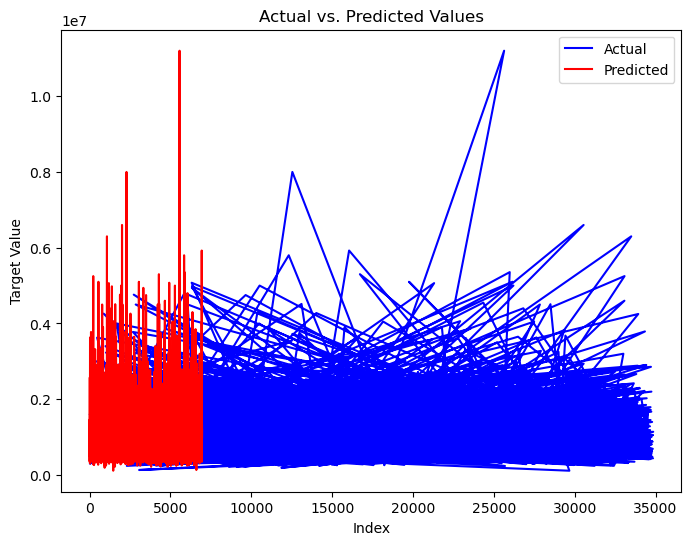

In [232]:
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the actual target values and 'y_pred' contains the predicted values

# Plot the actual values and predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
#the graph is for support vector regression